# Time series analysis - Monthly

### Required imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing#######
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, adfuller
import statsmodels.api as sm
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
month_data=pd.read_csv('/Users/harinim/downloads/nitm18442004.csv')
print(" Monthly")    # Figure 1
month_data

 Monthly


,x
0,4.5
1,2.4
2,4.8
3,9.1
4,10.9
...,...
1927,15.4
1928,13.2
1929,8.6
1930,8.2


### Data description and pre processing

In [3]:
na_values=pd.DataFrame(month_data.isna().sum())
print("Monthly")       # Figure 3
na_values.head(25)

Monthly


,0
x,0


In [4]:
# Create a date range from January 1884 to December 2004

monthly_dates = pd.date_range(start='1844-01-01', end='2004-12-01', freq='MS')
monthly_data = pd.Series(month_data['x'], index=monthly_dates)
monthly_data = month_data.squeeze()
monthly_data.index = monthly_dates


In [5]:
print("   Monthly")      # Figure 4
pd.DataFrame(monthly_data.head())

   Monthly


,x
1844-01-01,4.5
1844-02-01,2.4
1844-03-01,4.8
1844-04-01,9.1
1844-05-01,10.9


In [6]:
print(monthly_data.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 1932 entries, 1844-01-01 to 2004-12-01
Freq: MS
Series name: x
Non-Null Count  Dtype  
--------------  -----  
1932 non-null   float64
dtypes: float64(1)
memory usage: 30.2 KB
None


In [7]:
print("    Monthly")     # Figure 2
pd.DataFrame(monthly_data.describe())

    Monthly


,x
count,1932.000000
mean,8.500776
std,3.825564
min,-0.900000
25%,5.300000
50%,8.200000
75%,12.100000
max,17.200000


In [8]:
# ADF TEST
adf_test = adfuller(monthly_data)
print('ADF test statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical values:', adf_test[4])

ADF test statistic: -5.00062397412046
p-value: 2.2130135390222494e-05
Critical values: {'1%': -3.433787340386774, '5%': -2.8630583903440656, '10%': -2.567578333092222}


#### Visualisation

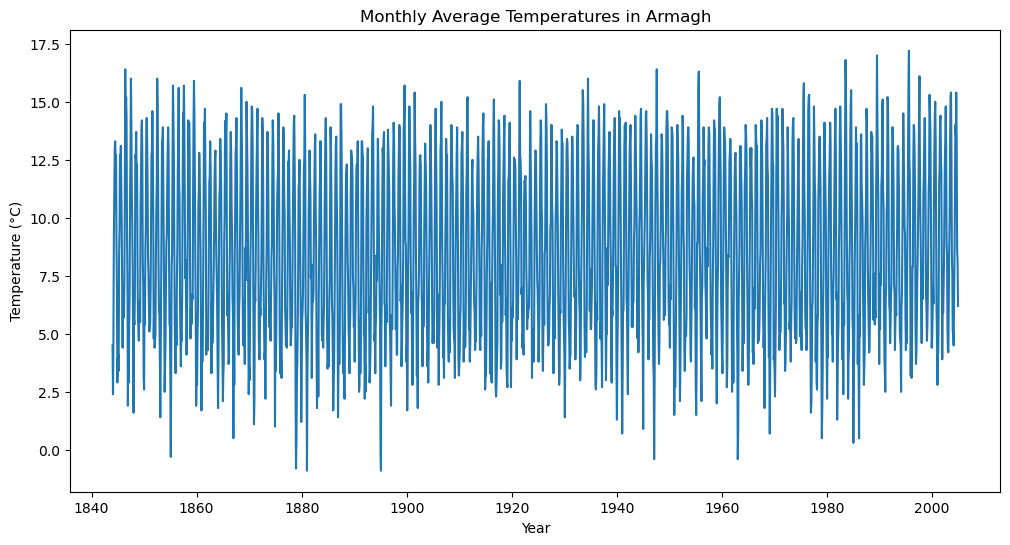

In [9]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title('Monthly Average Temperatures in Armagh')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

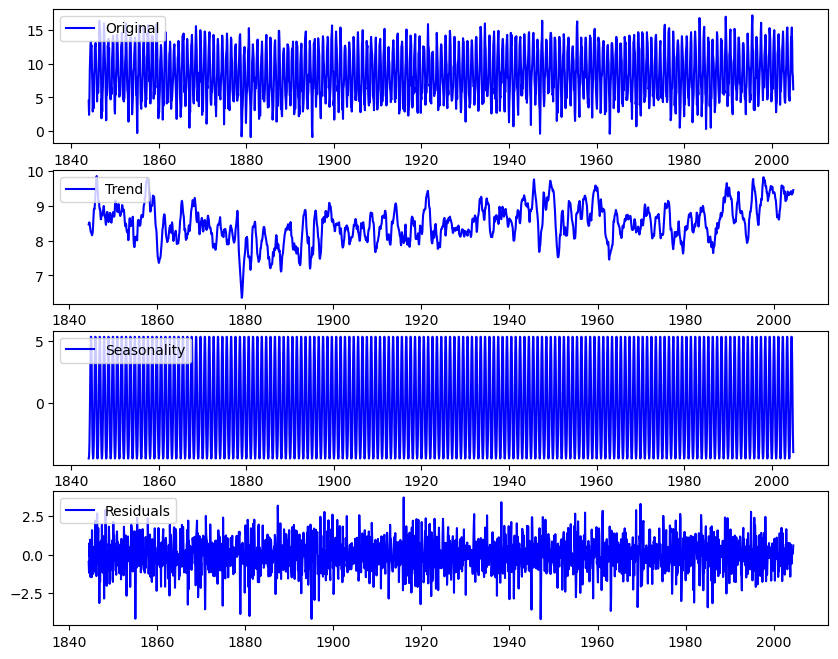

In [10]:
# plot the seasonal decomposition      figure 7
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_data, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(monthly_data, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

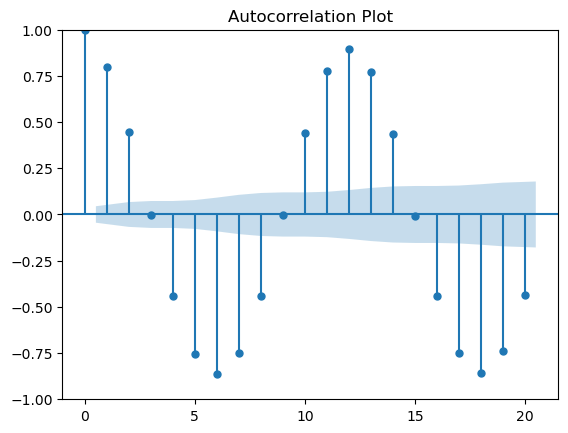

<Figure size 1000x600 with 0 Axes>

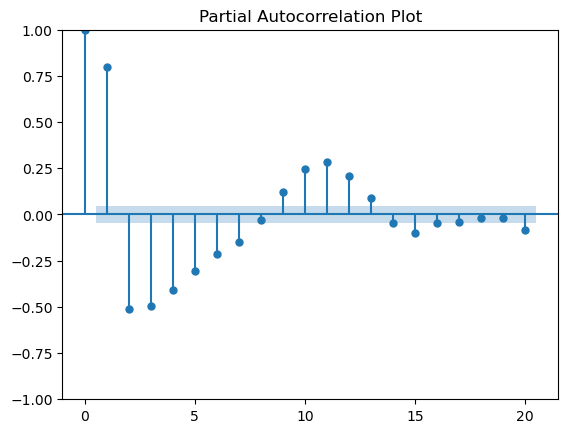

In [11]:
# plot the autocorrelation and partial autocorrelation   Figure 12
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(monthly_data, lags=20)
plt.title('Autocorrelation Plot')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(monthly_data, lags=20)
plt.title('Partial Autocorrelation Plot')
plt.show()



### Split train and test

In [12]:
monthly_train = monthly_data.loc[:'2003']
monthly_test = monthly_data.loc['2004']

## Exponential smoothing

In [13]:
# Exponential smoothing
model_es = ExponentialSmoothing(monthly_train, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(monthly_test))

# hot linear
model_holt = ExponentialSmoothing(monthly_train,trend='add', damped=False)
fit_holt= model_holt.fit()
predictions_holt = fit_holt.forecast(len(monthly_test))

#holt winter
# fit model
model_hw = ExponentialSmoothing(monthly_train, seasonal_periods=12, trend='add', seasonal='add',damped=True)
fit_hw=model_hw.fit()
predictions_hw = fit_hw.forecast(len(monthly_test))

#damped trend
# fit model
model_damped = ExponentialSmoothing(monthly_train, trend='add', damped=True).fit()
predictions_damped = model_damped.forecast(len(monthly_test))

## SARIMA

In [14]:
# SARIMAX

model_sarima = SARIMAX(monthly_train, order=(0, 2, 2), seasonal_order=(0, 2, 2, 12), enforce_stationarity=False, 
                       enforce_invertibility=False)
fit_sarima = model_sarima.fit()
forecast_sarima = fit_sarima.forecast(len(monthly_test))

model_arima = ARIMA(monthly_train, order=(0, 1, 1))#, seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(len(monthly_test))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30593D+00    |proj g|=  1.19621D+00

At iterate    5    f=  2.24060D+00    |proj g|=  5.21326D-01

At iterate   10    f=  1.81419D+00    |proj g|=  1.19994D+00

At iterate   15    f=  1.71284D+00    |proj g|=  5.98473D-01

At iterate   20    f=  1.67749D+00    |proj g|=  1.69315D+00

At iterate   25    f=  1.64374D+00    |proj g|=  4.81789D-01

At iterate   30    f=  1.64146D+00    |proj g|=  1.08224D+00

At iterate   35    f=  1.62766D+00    |proj g|=  3.96309D+00

At iterate   40    f=  1.62179D+00    |proj g|=  1.65227D+00

At iterate   45    f=  1.62026D+00    |proj g|=  4.20204D-01

At iterate   50    f=  1.62025D+00    |proj g|=  1.70594D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

### simple time series

In [15]:
#Simple time series models
model_ses = SimpleExpSmoothing(monthly_train)
fit_ses= model_ses.fit()
pred_ses = fit_ses.forecast(len(monthly_test))
##########random walk
result = seasonal_decompose(monthly_train, model='additive', period=12)
seasonal = result.seasonal
forecast_rw = monthly_test.shift(1)


# fit and forecast using Seasonal Naive model
seasonal_naive_model = sm.tsa.UnobservedComponents(monthly_train, 'local level', seasonal=12)
fit_snaive=seasonal_naive_model.fit()
forecast_snaive = fit_snaive.forecast(steps=len(monthly_test))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88645D+00    |proj g|=  1.26621D-01

At iterate    5    f=  1.64580D+00    |proj g|=  1.69856D-01

At iterate   10    f=  1.61686D+00    |proj g|=  5.85444D-02

At iterate   15    f=  1.61555D+00    |proj g|=  2.23028D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     29      1     0     0   2.088D-05   1.616D+00
  F =   1.6155450819116615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


## Forecasts analysis

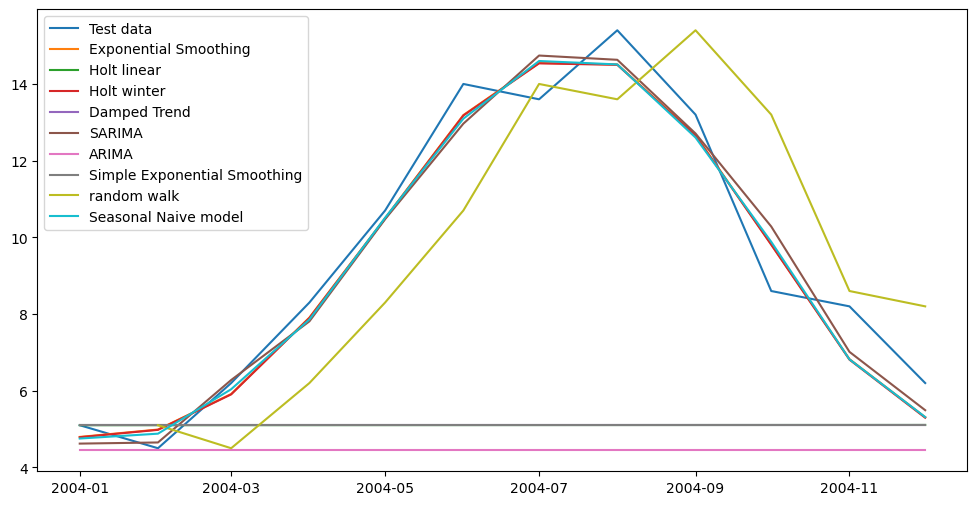

In [16]:
# Plot the actual and predicted values   Figure 10
plt.figure(figsize=(12, 6))
plt.plot(monthly_test.index, monthly_test.values, label='Test data')
plt.plot(forecast_es.index, forecast_es.values, label='Exponential Smoothing')
plt.plot(predictions_holt.index, predictions_holt.values, label='Holt linear')
plt.plot(predictions_hw.index, predictions_hw.values, label='Holt winter')
plt.plot(predictions_damped.index, predictions_damped.values, label='Damped Trend')
plt.plot(forecast_sarima.index, forecast_sarima.values, label='SARIMA')
plt.plot(forecast_arima.index, forecast_arima.values, label='ARIMA')
plt.plot(pred_ses.index, pred_ses.values, label='Simple Exponential Smoothing')
plt.plot(forecast_rw.index, forecast_rw.values, label='random walk')
plt.plot(forecast_snaive.index, forecast_snaive.values, label='Seasonal Naive model')
plt.legend()
plt.show()



In [17]:
# Calculate and displaying evaluation metrics   # Figure 9

mse_es = mean_squared_error(monthly_test, forecast_es)
mae_es = mean_absolute_error(monthly_test, forecast_es)
r2_es = r2_score(monthly_test, forecast_es)
rmse_es = mean_squared_error(monthly_test, forecast_es, squared=False)
mape_es = mean_absolute_percentage_error(monthly_test, forecast_es)

mse_hl = mean_squared_error(monthly_test, predictions_holt)
mae_hl = mean_absolute_error(monthly_test, predictions_holt)
r2_hl = r2_score(monthly_test, predictions_holt)
rmse_hl = mean_squared_error(monthly_test, predictions_holt, squared=False)
mape_hl = mean_absolute_percentage_error(monthly_test, predictions_holt)

mse_hw = mean_squared_error(monthly_test, predictions_hw)
mae_hw = mean_absolute_error(monthly_test, predictions_hw)
r2_hw = r2_score(monthly_test, predictions_hw)
rmse_hw = mean_squared_error(monthly_test, predictions_hw, squared=False)
mape_hw = mean_absolute_percentage_error(monthly_test, predictions_hw)

mse_d = mean_squared_error(monthly_test, predictions_damped)
mae_d = mean_absolute_error(monthly_test, predictions_damped)
r2_d = r2_score(monthly_test, predictions_damped)
rmse_d = mean_squared_error(monthly_test, predictions_damped, squared=False)
mape_d = mean_absolute_percentage_error(monthly_test, predictions_damped)

mse_sarima = mean_squared_error(monthly_test, forecast_sarima)
mae_sarima = mean_absolute_error(monthly_test, forecast_sarima)
r2_sarima = r2_score(monthly_test, forecast_sarima)
rmse_sarima = mean_squared_error(monthly_test, forecast_sarima, squared=False)
mape_sarima = mean_absolute_percentage_error(monthly_test, forecast_sarima)

mse_arima = mean_squared_error(monthly_test, forecast_arima)
mae_arima = mean_absolute_error(monthly_test, forecast_arima)
r2_arima = r2_score(monthly_test, forecast_arima)
rmse_arima = mean_squared_error(monthly_test, forecast_arima, squared=False)
mape_arima = mean_absolute_percentage_error(monthly_test, forecast_arima)

mse_ses = mean_squared_error(monthly_test, pred_ses)
mae_ses = mean_absolute_error(monthly_test, pred_ses)
r2_ses = r2_score(monthly_test, pred_ses)
rmse_ses = mean_squared_error(monthly_test, pred_ses, squared=False)
mape_ses = mean_absolute_percentage_error(monthly_test, pred_ses)

mse_sn = mean_squared_error(monthly_test, forecast_snaive)
mae_sn = mean_absolute_error(monthly_test, forecast_snaive)
r2_sn = r2_score(monthly_test, forecast_snaive)
rmse_sn = mean_squared_error(monthly_test, forecast_snaive, squared=False)
mape_sn = mean_absolute_percentage_error(monthly_test, forecast_snaive)


# Evaluate the models based on the evaluation metrics
metrics = pd.DataFrame({
                       'Exponential Smoothing': [mse_es, mae_es, r2_es, rmse_es, mape_es],
                       'Holt Linear': [mse_hl, mae_hl, r2_hl, rmse_hl, mape_hl],
                       'Holt winter': [mse_hw, mae_hw, r2_hw, rmse_hw, mape_hw],
                       'Damped trend': [mse_d, mae_d, r2_d, rmse_d, mape_d],
                        'SARIMA': [mse_sarima, mae_sarima, r2_sarima, rmse_sarima, mape_sarima],
                        'ARIMA': [mse_arima, mae_arima, r2_arima, rmse_arima, mape_arima],
                        'SEASONAL NAIVE': [mse_sn, mae_sn, r2_sn, rmse_sn, mape_sn],
                       'Simple Exponential Smoothing': [mse_ses, mae_ses, r2_ses, rmse_ses, mape_ses]},
                       index=['MSE', 'MAE', 'R2','RMSE','MAPE'])

metrics

,Exponential Smoothing,Holt Linear,Holt winter,Damped trend,SARIMA,ARIMA,SEASONAL NAIVE,Simple Exponential Smoothing
MSE,0.618375,32.409795,0.624252,32.450000,0.708119,38.625722,0.652387,32.450000
MAE,0.695483,4.496319,0.700691,4.500000,0.703379,5.053288,0.705042,4.500000
R2,0.952760,-1.475920,0.952311,-1.478992,0.945904,-1.950781,0.950161,-1.478992
RMSE,0.786368,5.692960,0.790096,5.696490,0.841498,6.214960,0.807705,5.696490
MAPE,0.079997,0.393397,0.080564,0.393774,0.076671,0.452053,0.079253,0.393774


In [18]:
# AIC - Akaike Information Criterion and BIC - Bayesian Information Criterion.

aic = fit_es.aic
bic = fit_es.bic

print('exponential smoothing AIC:', aic)
print('exponential smoothing BIC:', bic)

aic = fit_hw.aic
bic = fit_hw.bic

print('Holt winter AIC:', aic)
print('Holt winter BIC:', bic)

aic = fit_sarima.aic
bic = fit_sarima.bic

print('SARIMA AIC:', aic)
print('SARIMA BIC:', bic)

aic = fit_snaive.aic
bic = fit_snaive.bic

print('Seasonal Naive AIC:', aic)
print('Seasonal Naive BIC:', bic)



exponential smoothing AIC: 758.9611135390905
exponential smoothing BIC: 847.9224009794398
Holt winter AIC: 760.4526109691475
Holt winter BIC: 854.9739788745186
SARIMA AIC: 6231.741022487875
SARIMA BIC: 6259.401463205583
Seasonal Naive AIC: 6209.69311454078
Seasonal Naive BIC: 6226.354547096805


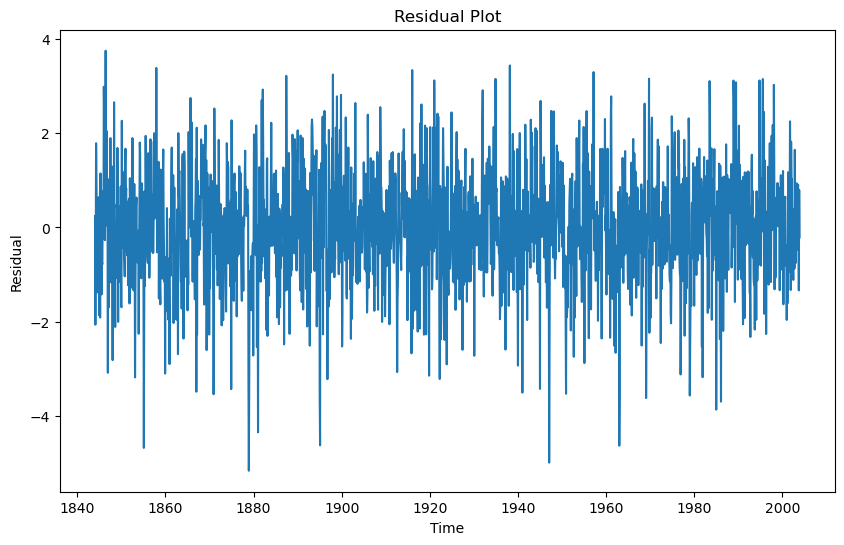

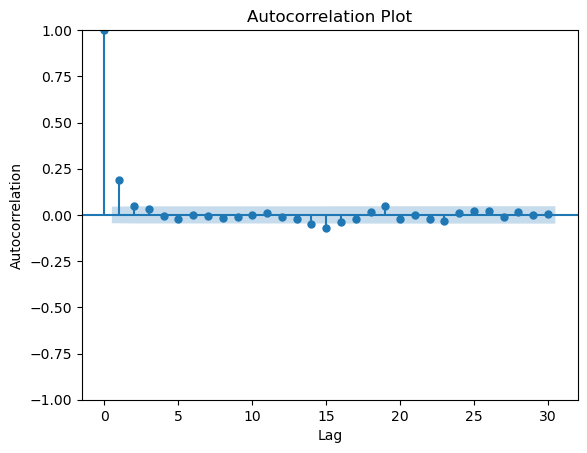

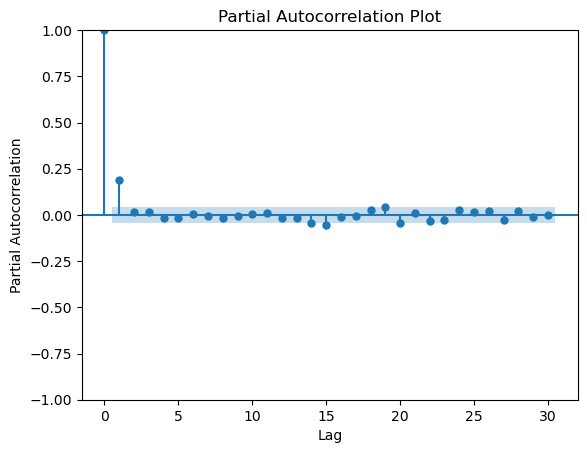

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Get the residuals
residuals = pd.Series(fit_es.resid)

# Create the residual plot
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()
########
plot_acf(residuals, lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
# Create the partial autocorrelation plot
plot_pacf(residuals, lags=30)
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()
#################need to do for all??

In [20]:
from statsmodels.stats.stattools import jarque_bera

# Perform Jarque-Bera test
_, pvalue, _, _ = jarque_bera(residuals)
print(pvalue)

# Check normality assumption
if pvalue < 0.05:
    print('The residuals are not normally distributed.')
else:
    print('The residuals are normally distributed.')


6.800360716596164e-14
The residuals are not normally distributed.


In [21]:
dwtest = durbin_watson(forecast_es)

# Print the Durbin-Watson statistic and p-value
print(f'Durbin-Watson statistic: {dwtest:.2f}')
if dwtest < 2 or dwtest > 4:
    print('Autocorrelation is present')

Durbin-Watson statistic: 0.04
Autocorrelation is present


In [22]:
model_es = ExponentialSmoothing(monthly_data, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(monthly_test))
   
print('Forecasts for the next 12 months:\n', forecast_es)


Forecasts for the next 12 months:
 2005-01-01     4.871084
2005-02-01     5.058662
2005-03-01     5.989718
2005-04-01     7.984125
2005-05-01    10.574187
2005-06-01    13.267356
2005-07-01    14.616425
2005-08-01    14.589716
2005-09-01    12.742511
2005-10-01     9.885369
2005-11-01     6.905865
2005-12-01     5.388476
Freq: MS, dtype: float64
